In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sys.path.append("C:/Users/44756/Documents/Postgrad/DSA8030/Data/")

In [3]:
# Import and preview raw dataset, though making zip code a string
init_data = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/realtor-data.csv", dtype = {'brokered_by':'string', 'street':'string', 'zip_code':'string'})
init_data

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,00601,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,00601,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,00795,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,00731,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,00680,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354,933.0,2022-03-24


In [4]:
# Check data type for each variable
init_data.dtypes

brokered_by       string[python]
status                    object
price                    float64
bed                      float64
bath                     float64
acre_lot                 float64
street            string[python]
city                      object
state                     object
zip_code          string[python]
house_size               float64
prev_sold_date            object
dtype: object

In [5]:
init_data.describe()

,price,bed,bath,acre_lot,house_size
count,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,1.657898e+06
mean,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,2.714471e+03
std,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,8.081635e+05
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00
25%,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,1.300000e+03
50%,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.760000e+03
75%,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,2.413000e+03
max,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,1.040400e+09


In [6]:
# Check frequencies of sale status within data
init_data.value_counts(subset = 'status')
# Working with 'sold' houses allows us to use probably the most accurate data, and with >812000 entries, we have a sufficient number of them.

status
for_sale          1389306
sold               812009
ready_to_build      25067
Name: count, dtype: int64

In [7]:
# Check missingness counts for different variables among sold houses.
init_data[init_data.status == 'sold'].isnull().sum()
# There is a small number of houses with price missing. Since imputing the target variable isn't generally advised, we will remove that very small proportion.
# We will consider other variables during the proper cleaning stage.

brokered_by         3020
status                 0
price                245
bed                69974
bath               77929
acre_lot          107622
street              2277
city                  98
state                  0
zip_code              12
house_size        103710
prev_sold_date         0
dtype: int64

In [8]:
sold = init_data[init_data.price.notna() & (init_data.status == 'sold')]
sold.isnull().sum()

brokered_by         3020
status                 0
price                  0
bed                69912
bath               77867
acre_lot          107613
street              2277
city                  98
state                  0
zip_code              12
house_size        103627
prev_sold_date         0
dtype: int64

In [9]:
# Filter for sold houses with prev_sold_date of the form 1###-##-## or 2###-##-## to remove erroneous dates
sold_valdate = sold[sold.prev_sold_date.str.match('^[12][0-9]{3}-[0-9]{2}-[0-9]{2}')]

In [39]:
# Convert date column to datetime type
sold_valdate.prev_sold_date = pd.to_datetime(sold_valdate['prev_sold_date'], format = "%Y-%M-%d")
sold_valdate.dtypes

C:\Users\44756\AppData\Local\Temp\ipykernel_25020\2571988916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sold_valdate.prev_sold_date = pd.to_datetime(sold_valdate['prev_sold_date'], format = "%Y-%M-%d")


brokered_by       string[python]
status                    object
price                    float64
bed                      float64
bath                     float64
acre_lot                 float64
street            string[python]
city                      object
state                     object
zip_code          string[python]
house_size               float64
prev_sold_date    datetime64[ns]
dtype: object

In [40]:
# Summary statistics for sold properties.
sold_valdate.describe()

,price,bed,bath,acre_lot,house_size,prev_sold_date
count,8.117630e+05,741851.000000,733896.000000,704151.000000,708136.000000,811763
mean,4.841722e+05,3.193862,2.394575,12.339567,1914.107478,2021-09-26 18:57:08.367269120
min,1.000000e+00,1.000000,1.000000,0.000000,100.000000,2021-01-01 00:11:00
25%,2.020000e+05,3.000000,2.000000,0.140000,1261.000000,2021-01-28 00:12:00
50%,3.449000e+05,3.000000,2.000000,0.210000,1680.000000,2022-01-10 00:03:00
75%,5.500000e+05,4.000000,3.000000,0.450000,2269.000000,2022-01-21 00:03:00
max,2.950000e+08,444.000000,222.000000,100000.000000,933491.000000,2022-01-31 00:03:00
std,7.880800e+05,1.305129,1.156728,773.512847,2590.905064,NaN


In [12]:
# Correlations for sold properties.
sold_valdate.corr(numeric_only = True)

,price,bed,bath,acre_lot,house_size
price,1.000000,0.217537,0.378673,0.004242,0.183048
bed,0.217537,1.000000,0.646947,0.000454,0.325097
bath,0.378673,0.646947,1.000000,-0.002083,0.388819
acre_lot,0.004242,0.000454,-0.002083,1.000000,0.000389
house_size,0.183048,0.325097,0.388819,0.000389,1.000000


In [13]:
num_vars = ['bed', 'bath', 'acre_lot', 'house_size']

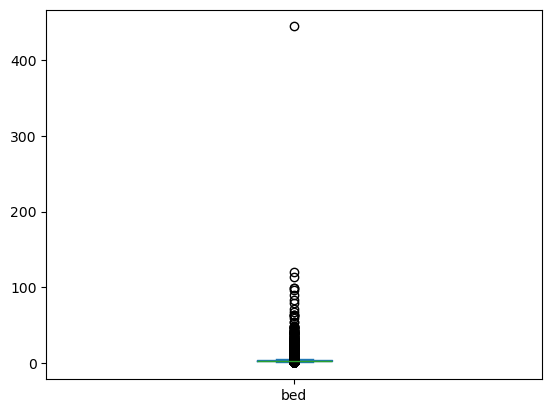

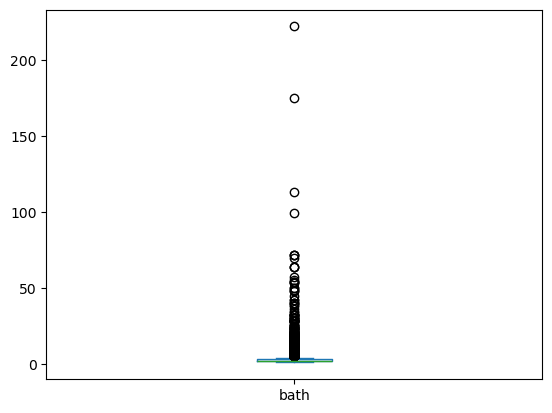

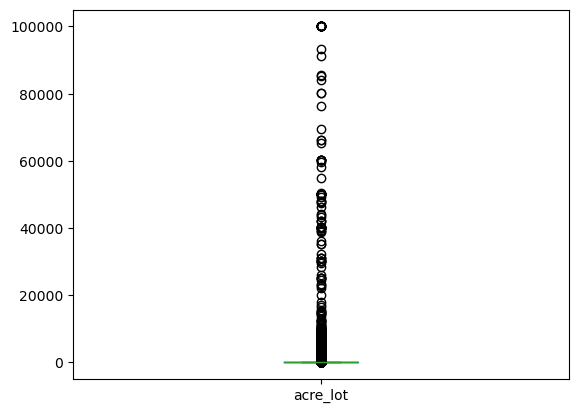

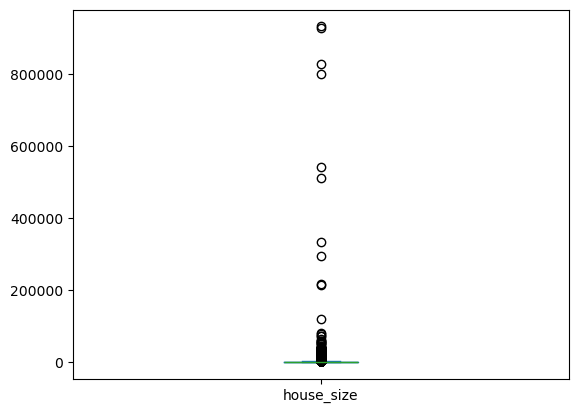

In [14]:
# Observing outliers in numerical variables.
for var in num_vars:
    sold_valdate[var].plot.box()
    plt.show()

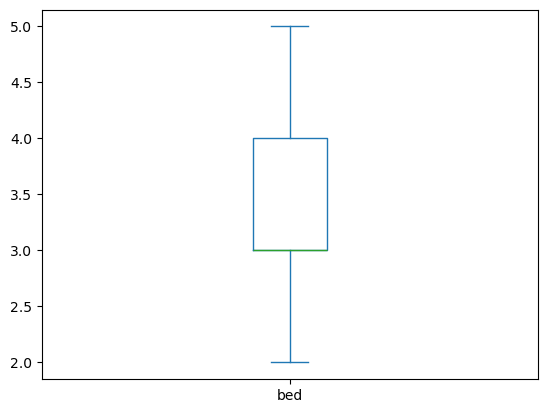

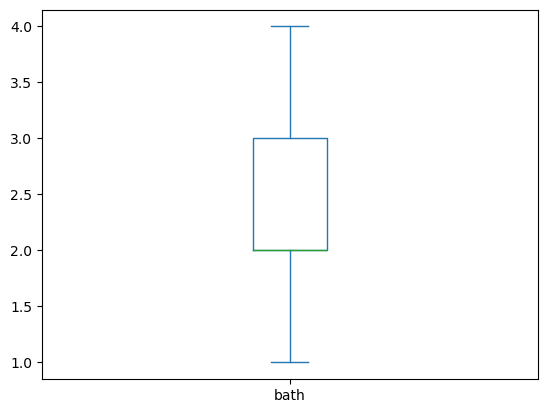

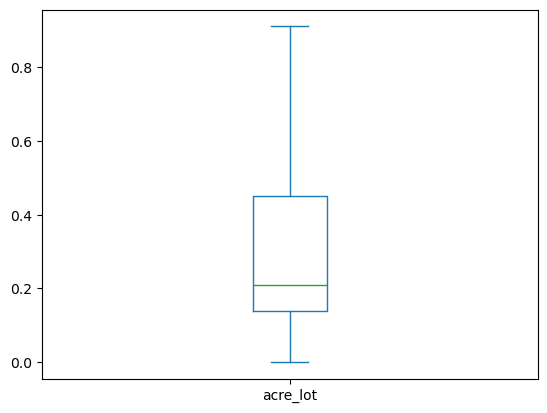

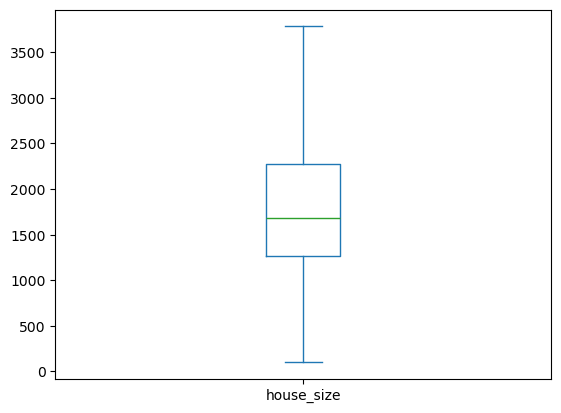

In [15]:
# Boxplots without outliers
for var in num_vars:
    sold_valdate[var].plot.box(showfliers = False)
    plt.show()

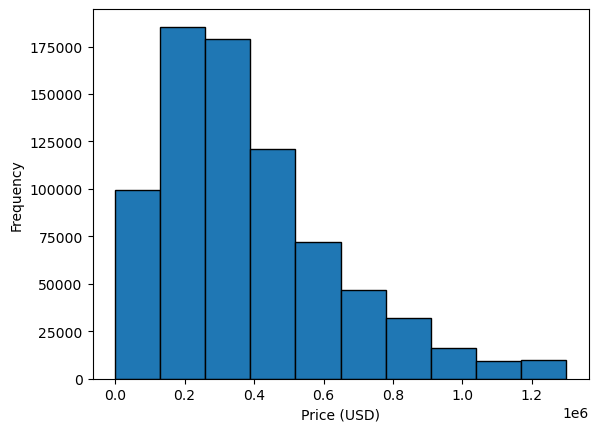

In [16]:
# Histogram of prices with a 95% cutoff

fig, ax = plt.subplots()

ax.hist(sold_valdate[sold_valdate.price <= sold_valdate.price.quantile(0.95)].price, ec = 'black')
ax.set_xlabel('Price (USD)')
ax.set_ylabel('Frequency')
plt.show()

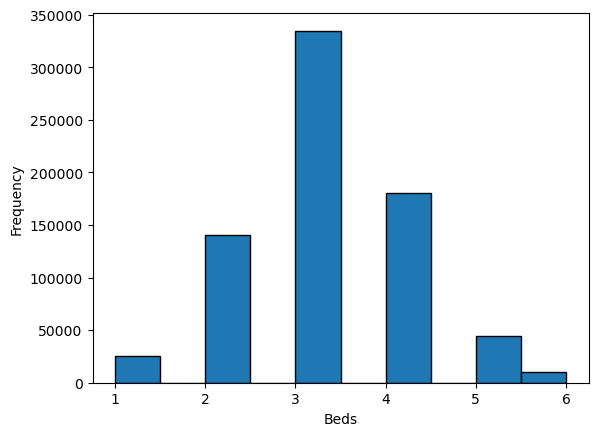

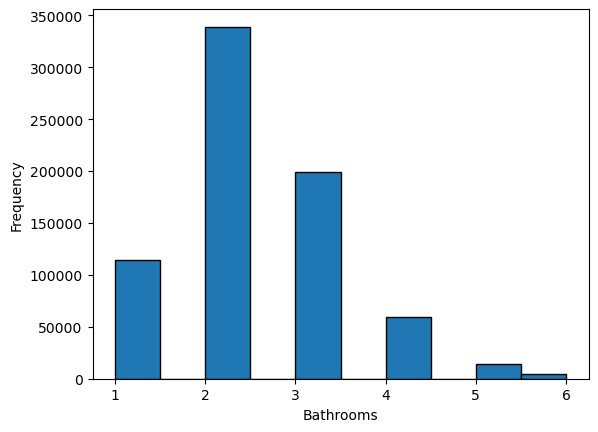

In [17]:
# Histogram of bed and bathroom numbers with a 99% cutoff

fig, ax = plt.subplots()

ax.hist(sold_valdate[sold_valdate.bed <= sold_valdate.bed.quantile(0.99)].bed, ec = 'black')
ax.set_xlabel('Beds')
ax.set_ylabel('Frequency')
plt.show()

fig, ax = plt.subplots()

ax.hist(sold_valdate[sold_valdate.bath <= sold_valdate.bath.quantile(0.99)].bath, ec = 'black')
ax.set_xlabel('Bathrooms')
ax.set_ylabel('Frequency')
plt.show()

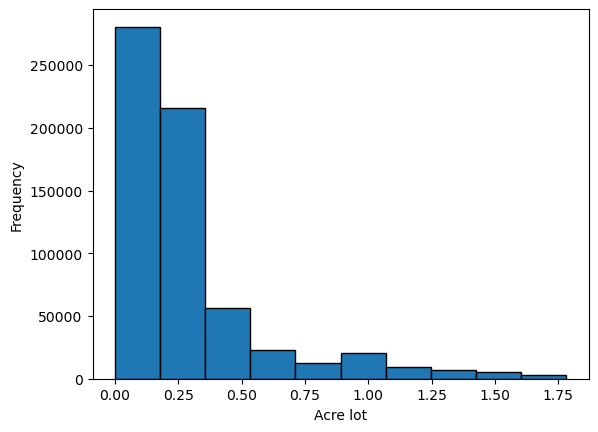

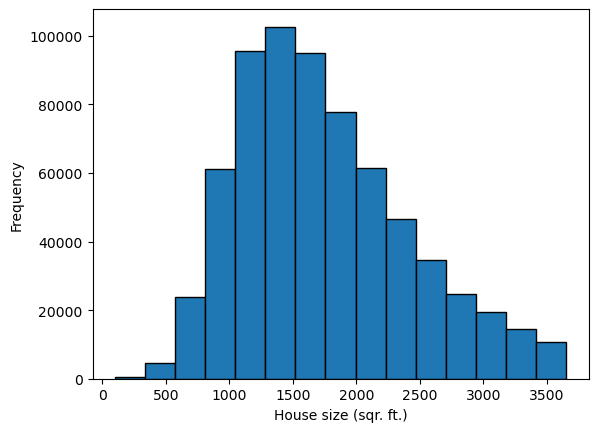

In [18]:
# Histogram of acre lot and house size with a 90% and 95% cutoff respectively

fig, ax = plt.subplots()

ax.hist(sold_valdate[sold_valdate.acre_lot <= sold_valdate.acre_lot.quantile(0.90)].acre_lot, ec = 'black')
ax.set_xlabel('Acre lot')
ax.set_ylabel('Frequency')
plt.show()

fig, ax = plt.subplots()

ax.hist(sold_valdate[sold_valdate.house_size <= sold_valdate.house_size.quantile(0.95)].house_size, bins = 15, ec = 'black')
ax.set_xlabel('House size (sqr. ft.)')
ax.set_ylabel('Frequency')
plt.show()

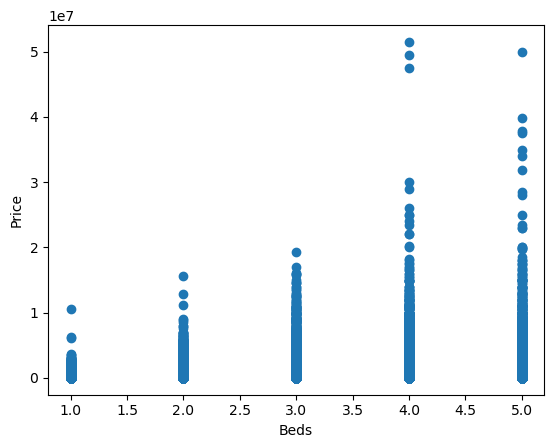

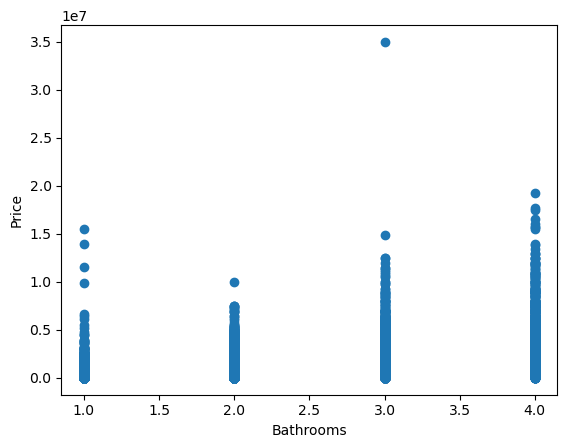

In [19]:
# Scatter plots of price vs beds and bathrooms
fig, ax = plt.subplots()

ax.scatter(sold_valdate[sold_valdate.bed <= sold_valdate.bed.quantile(0.95)].bed, sold_valdate[sold_valdate.bed <= sold_valdate.bed.quantile(0.95)].price)
ax.set_xlabel('Beds')
ax.set_ylabel('Price')
plt.show()

fig, ax = plt.subplots()

ax.scatter(sold_valdate[sold_valdate.bath <= sold_valdate.bath.quantile(0.95)].bath, sold_valdate[sold_valdate.bath <= sold_valdate.bath.quantile(0.95)].price)
ax.set_xlabel('Bathrooms')
ax.set_ylabel('Price')
plt.show()

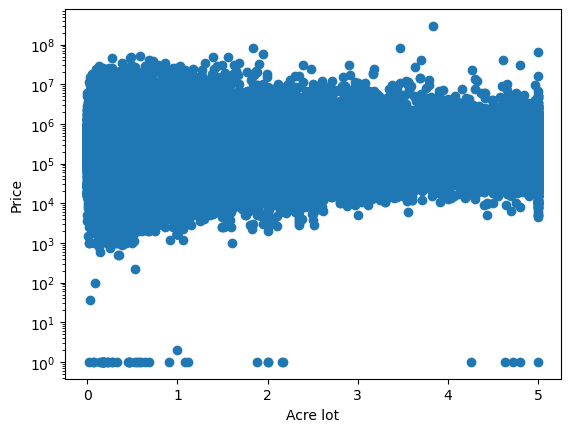

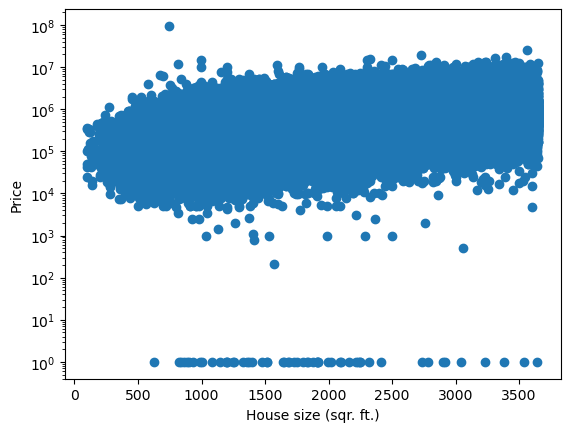

In [20]:
# Scatter plots of price vs acre lot and house size
fig, ax = plt.subplots()

ax.scatter(sold_valdate[sold_valdate.acre_lot <= sold_valdate.acre_lot.quantile(0.95)].acre_lot, sold_valdate[sold_valdate.acre_lot <= sold_valdate.acre_lot.quantile(0.95)].price)
ax.set_yscale('log')
ax.set_xlabel('Acre lot')
ax.set_ylabel('Price')
plt.show()

fig, ax = plt.subplots()

ax.scatter(sold_valdate[sold_valdate.house_size <= sold_valdate.house_size.quantile(0.95)].house_size, sold_valdate[sold_valdate.house_size <= sold_valdate.house_size.quantile(0.95)].price)
ax.set_yscale('log')
ax.set_xlabel('House size (sqr. ft.)')
ax.set_ylabel('Price')
plt.show()

In [21]:
# Number of zip codes in our dataset
len(sold_valdate.zip_code.unique().tolist())

19739

In [22]:
# "US Zip Codes Demographics" dataset
demo_data = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/zip_code_demographics.csv", dtype = {'zip':'string'})

In [23]:
demo_data

,zip,lat,lng,city,state_id,state_name,population,density,county_name,po_box,dist_highway,dist2_large_airport,dist2_medium_airport,dist_to_shore,number_of_business,adjusted_gross_income,total_income_amount,number_of_returns
0,1001,42.06262,-72.62521,Agawam,MA,Massachusetts,16088,550.1,Hampden,0,1.387035,106.145765,12.946212,93.049251,438.0,598807,6.047690e+05,9320
1,1002,42.37633,-72.46462,Amherst,MA,Massachusetts,27323,198.1,Hampshire,0,14.438177,112.264368,21.080079,133.370144,571.0,989558,1.005796e+06,9880
2,1005,42.42117,-72.10655,Barre,MA,Massachusetts,4947,44.2,Worcester,0,16.788339,90.664964,25.547718,97.639881,97.0,164207,1.660540e+05,2490
3,1007,42.28163,-72.40009,Belchertown,MA,Massachusetts,15304,107.7,Hampshire,0,13.663839,101.552921,14.762395,114.406034,217.0,647074,6.547390e+05,7970
4,1008,42.18234,-72.95819,Blandford,MA,Massachusetts,1171,7.4,Hampden,0,2.593655,136.548797,20.177950,107.466779,18.0,47826,4.824100e+04,660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33699,28388,35.18000,-79.40000,Southern Pines,NC,North Carolina,15158,198.2,Moore,1,29.611385,95.336980,35.052347,172.197809,637.0,652358,6.615840e+05,7740
33700,28765,35.96000,-82.12000,Spruce Pine,NC,North Carolina,10318,55.5,Mitchell,1,34.660884,134.931257,62.822117,402.428512,280.0,196579,1.988100e+05,3910
33701,40027,38.28000,-85.62000,Louisville,KY,Kentucky,21622,883.0,Jefferson,1,1.148362,15.509671,6.927500,400.646608,1133.0,1333163,1.350029e+06,11760
33702,40292,38.22000,-85.74000,Louisville,KY,Kentucky,12029,1936.4,Jefferson,1,1.017999,5.082523,6.724578,403.729631,270.0,323448,3.268630e+05,6500


In [24]:
# Seeing how many zip codes appear in both datasets, want 19739
len(set(sold_valdate.zip_code.tolist()) & set(demo_data.zip.tolist()))

18375

In [25]:
sold_valdate[sold_valdate.zip_code.isin(list(set(sold_valdate.zip_code.tolist()) & set(demo_data.zip.tolist())))]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1419688,94681.0,sold,325000.0,NaN,NaN,16.70,1738940.0,Austerlitz,New York,12017,NaN,2022-01-14 00:04:00
1419697,10211.0,sold,249900.0,2.0,1.0,3.08,372404.0,Canaan,New York,12029,1944.0,2022-01-18 00:03:00
1419825,38575.0,sold,249900.0,3.0,2.0,2.20,927492.0,Copake,New York,12502,1632.0,2021-01-17 00:12:00
1419827,41051.0,sold,295000.0,2.0,1.0,0.30,561490.0,Millerton,New York,12546,950.0,2022-01-15 00:02:00
1419829,45488.0,sold,425000.0,3.0,2.0,0.40,653222.0,Copake,New York,12516,1536.0,2022-01-04 00:03:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354,3600.0,2022-01-25 00:03:00
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354,1616.0,2022-01-25 00:03:00
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354,3200.0,2022-01-24 00:03:00
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354,933.0,2022-01-24 00:03:00


In [26]:
# "US Zip Codes, Geocodes, Lat & Long" dataset
geo_data = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/geo_code_data.csv", dtype = {'ZIP':'string'})

In [27]:
# Seeing how many zip codes appear in both datasets, want 19739
len(set(sold_valdate.zip_code.tolist()) & set(geo_data.ZIP.tolist()))

19720

In [28]:
null_zips = list(set(sold_valdate.zip_code.tolist()) - set(geo_data.ZIP.tolist()))
null_zips

['08883',
 '06421',
 '12509',
 '72748',
 '26345',
 '44784',
 '11745',
 '26281',
 '77981',
 '12437',
 '60418',
 '02369',
 '77416',
 '99007',
 '44747',
 '26551',
 '98211',
 '67375',
 <NA>]

In [29]:
# Conclusion: Using the geographical data we would lose only 47 listings, but the usefulness of this data is questionable
len(sold_valdate[sold_valdate.zip_code.isin(null_zips)])

47

In [30]:
# Import ZC to ZCTA crosswalk
zc_zcta = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/zip_zcta_xref.csv", dtype = {'zip_code':'string', 'zcta':'string'})

In [ ]:
sold_valdate_zcta = pd.merge(sold_valdate, zc_zcta, on = 'zip_code')

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,zcta,source
0,62066.0,sold,77500.0,3.0,1.0,NaN,1072625.0,Ponce,Puerto Rico,00717,957.0,2021-01-29 00:11:00,00717,tiger
1,72457.0,sold,524900.0,3.0,2.0,0.09,1850809.0,Aguada,Puerto Rico,00602,2200.0,2021-01-13 00:12:00,00602,tiger
2,48586.0,sold,175000.0,NaN,NaN,0.14,1139965.0,Aguadilla,Puerto Rico,00603,3200.0,2021-01-29 00:11:00,00603,tiger
3,61711.0,sold,90000.0,3.0,2.0,0.08,141421.0,Aguadilla,Puerto Rico,00603,1421.0,2021-01-19 00:10:00,00603,tiger
4,49592.0,sold,22500.0,2.0,1.0,0.32,1889894.0,Anasco,Puerto Rico,00610,850.0,2021-01-30 00:12:00,00610,tiger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811727,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354,3600.0,2022-01-25 00:03:00,99354,geonames
811728,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354,1616.0,2022-01-25 00:03:00,99354,geonames
811729,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354,3200.0,2022-01-24 00:03:00,99354,geonames
811730,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354,933.0,2022-01-24 00:03:00,99354,geonames


In [35]:
sold_valdate.dtypes

brokered_by       string[python]
status                    object
price                    float64
bed                      float64
bath                     float64
acre_lot                 float64
street            string[python]
city                      object
state                     object
zip_code          string[python]
house_size               float64
prev_sold_date            object
dtype: object

In [43]:
len(sold_valdate.state.unique().tolist())

52

In [45]:
sold_valdate[sold_valdate.state == "Virgin Islands"].city.unique().tolist()

['Christiansted', 'Frederiksted', 'Kingshill']